##Importando dados

In [41]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Load the dataset
url = "https://raw.githubusercontent.com/paolasouza/data_mining_and_big_data/ec70f701a784820fa6ca326c0d51d8740028da03/projects.csv"
dados = pd.read_csv(url)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [28]:
x = dados[["unfinished","expected_hours","price"]] #features

In [29]:
y = dados["unfinished"] # classes
y.head()

0    1
1    1
2    1
3    1
4    1
Name: unfinished, dtype: int64

In [30]:
dados.shape

(2157, 3)

## Classificação Binária

In [31]:
x = dados[["expected_hours","price"]] #features
y = dados["unfinished"] # classes

In [46]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 20 # pode ser qualquer valor fixo
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#CLASSIFICADOR
modelo = LinearSVC() # cria um modelo
modelo.fit(treino_x, treino_y) #treina

previsoes = modelo.predict(teste_x) # teste
acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores

acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)

Treinamento com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%
A acurácia foi 47.41%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 52.59%


##Plotando Dados

<Axes: xlabel='expected_hours', ylabel='price'>

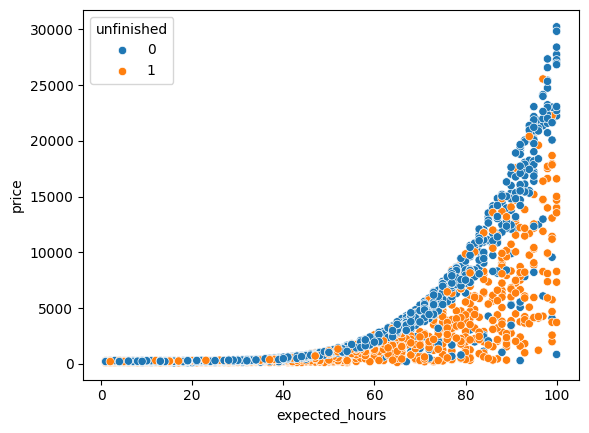

In [34]:
import seaborn as sns
sns.scatterplot(x="expected_hours", y="price", hue="unfinished", data=dados)

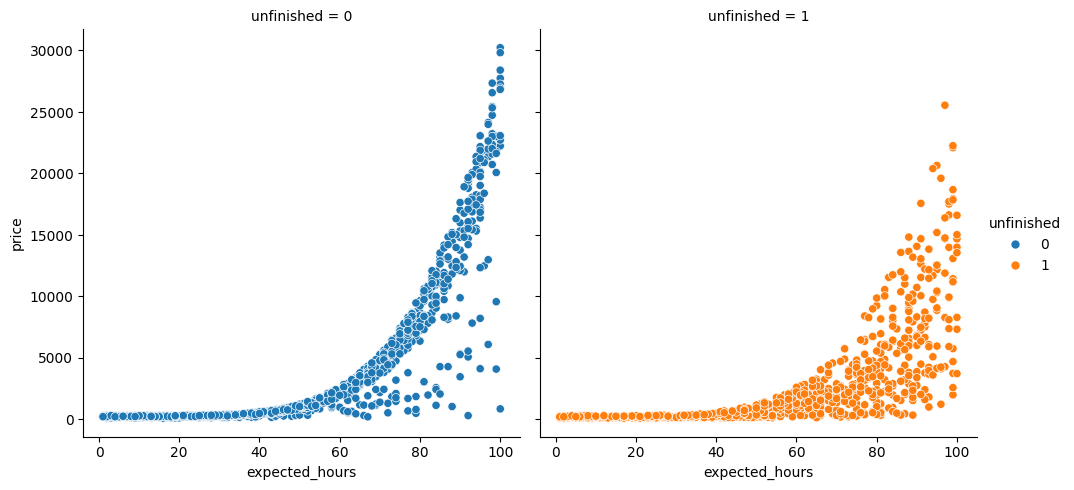

In [35]:
sns.relplot(x="expected_hours", y="price", hue="unfinished", col="unfinished", data=dados)

## Balanceamento de Dados

In [36]:
dados.unfinished.value_counts()

unfinished
0    1134
1    1023
Name: count, dtype: int64

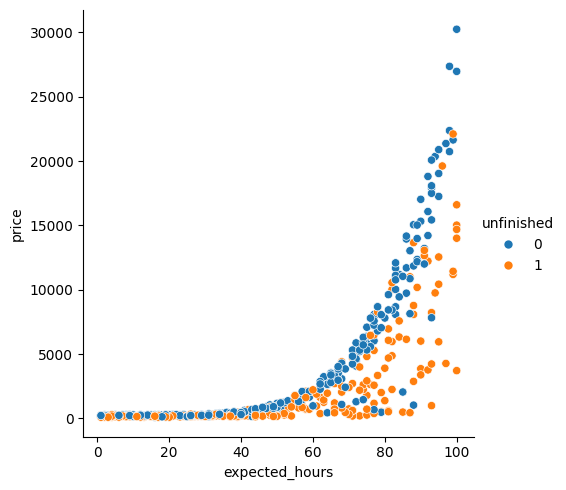

In [37]:
sns.relplot(x="expected_hours", y="price", hue=teste_y, data=teste_x)

1 100 102 30223


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


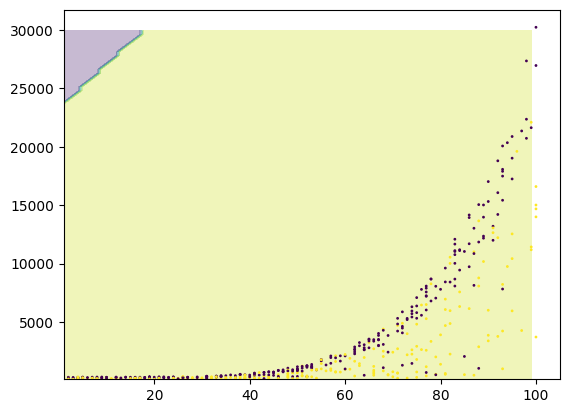

In [47]:
import numpy as np

x_min = teste_x['expected_hours'].min()
x_max = teste_x['expected_hours'].max()
y_min = teste_x['price'].min()
y_max = teste_x['price'].max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x['expected_hours'], teste_x['price'], c=teste_y, s=1) # Use the correct column name for the scatter plot as well

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 20 # pode ser qualquer valor fixo
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#CLASSIFICADOR
modelo = SVC(gamma = "auto") # cria um modelo
modelo.fit(treino_x, treino_y) #treina

previsoes = modelo.predict(teste_x) # teste
acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores

acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)

Treinamento com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.26%
A acurácia foi 59.26%


1 100 102 30223


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


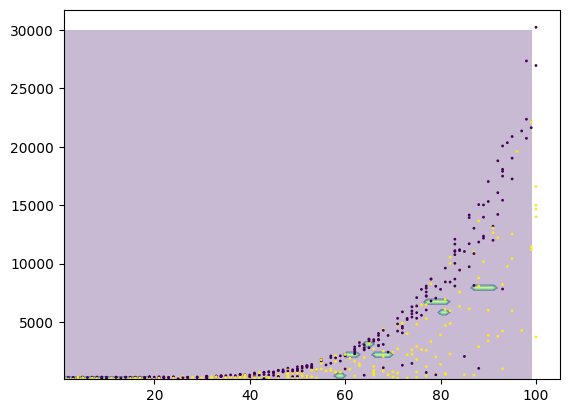

In [50]:
import numpy as np

x_min = teste_x['expected_hours'].min()
x_max = teste_x['expected_hours'].max()
y_min = teste_x['price'].min()
y_max = teste_x['price'].max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x['expected_hours'], teste_x['price'], c=teste_y, s=1) # Use the correct column name for the scatter plot as well


##StandardScaler

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 5 # pode ser qualquer valor fixo
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x) #Escalado
teste_x = scaler.transform(raw_teste_x) #Escalado

#CLASSIFICADOR
modelo = SVC(gamma="auto") # cria um modelo
modelo.fit(treino_x, treino_y) #treina

previsoes = modelo.predict(teste_x) # teste
acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores

acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)

Treinamento com 1617 elementos e testaremos com 540 elementos
A acurácia foi 67.22%
A acurácia foi 67.22%


-1.7378488427660956 1.7219205428392383 -0.599624152638435 4.834650682007863


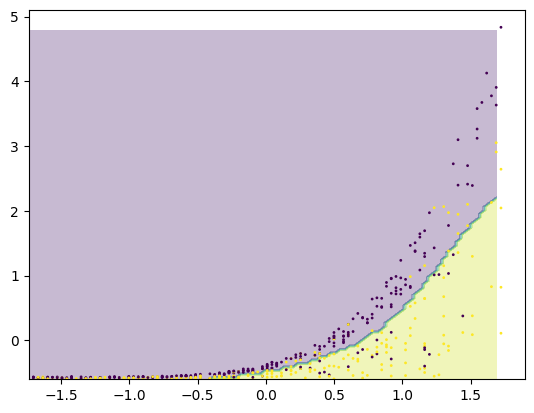

In [74]:
import numpy as np

data_x = teste_x[:,0]
data_y = teste_x[:,1]

#data_min = teste_x['expected_hours'].min()
#data_max = teste_x['expected_hours'].max()

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1) # Use the correct column name for the scatter plot as well


In [76]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 52.59%


Usando modelo SVC Standarscale

In [77]:
projeto = [100, 200]
projeto = scaler.transform([projeto])
projeto

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.72192054, -0.58015774]])

In [78]:
modelo.predict(projeto)

array([1])

In [79]:
projeto = [100, 20000]
projeto = scaler.transform([projeto])
projeto

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.72192054, 3.31312452]])

In [80]:
modelo.predict(projeto)

array([0])